In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv("../input/fastener-new-labelled-dataset/train_fastener.csv", index_col = 0)
train.head()

,images,labels
0,131004959_171473721383413_8222187747086021011_...,Defective
1,131051004_382613492830631_1306891331783850055_...,Defective
2,131065180_999185033824671_7735147288489715620_...,Defective
3,131084537_190751489449739_279862595635733772_n...,Defective
4,131092897_149705809860659_8798464983059531038_...,Defective


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  1260 non-null   object
 1   labels  1260 non-null   object
dtypes: object(2)
memory usage: 29.5+ KB


In [4]:
train["labels"].unique()

array(['Defective', 'Non Defective'], dtype=object)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
 #Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
train['labels']= label_encoder.fit_transform(train['labels'])
 
train['labels'].unique()

array([0, 1])

In [7]:
list(label_encoder.inverse_transform([0]))

['Defective']

In [8]:
train["labels"].value_counts()

0    630
1    630
Name: labels, dtype: int64

In [9]:
import os 

train_image = []

#Y = []

data_dir = '../input/fastener-new-labelled-dataset/dataset_new_fastener/dataset_new_fastener'
image_list = train['images'].to_list()

for im_name in tqdm(image_list):
    path = os.path.join(data_dir, im_name)
    img = image.load_img(path, target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    #Y.append(train['diseasetype'][i])

#Y = np.array(Y)
X = np.array(train_image)

100%|██████████| 1260/1260 [05:08<00:00,  4.08it/s]


In [10]:
X.shape

(1260, 400, 400, 3)

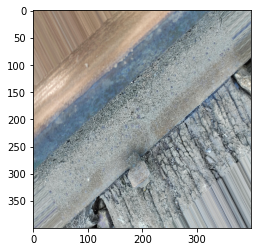

In [11]:
plt.imshow(X[570])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


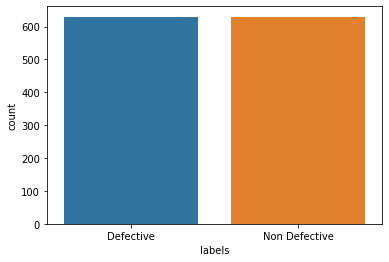

In [12]:
import seaborn as sns
# visualize the target variable
g = sns.countplot(train['labels'])
g.set_xticklabels(['Defective','Non Defective'])
plt.show()

In [13]:
Y = train['labels'].values

In [14]:
Y.shape

(1260,)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, stratify = Y)

In [16]:
Y_test

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

## Xception

In [18]:
import tensorflow as tf
import keras
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
from keras.applications.xception import Xception

from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, SimpleRNN, LSTM, GRU, Reshape, Concatenate,Bidirectional
#from keras.applications.MobileNet import preprocess_input
from keras.applications.xception import preprocess_input


from keras.layers import GaussianNoise
#local_weights_file = '../input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
f1_base = Xception(weights='imagenet', include_top=False, input_shape=(400,400,3))
#f1_base.load_weights(local_weights_file)
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(1024, activation='relu')(f1_x)
#f1_x = Dense(1, activation='relu')(f1_x)
f1_x = Dense(1, activation='sigmoid')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())

2022-05-12 06:03:01.512636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 06:03:01.608145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 06:03:01.609062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 06:03:01.611226: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 199, 199, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 199, 199, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 199, 199, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [19]:
model_1.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
result = model_1.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=8, verbose=1)

2022-05-12 06:03:09.285714: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1935360000 exceeds 10% of free system memory.
2022-05-12 06:03:11.518629: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1935360000 exceeds 10% of free system memory.
2022-05-12 06:03:13.194138: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-12 06:03:19.475926: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


126/126 [==============================] - ETA: 0s - loss: 0.5743 - accuracy: 0.7024

2022-05-12 06:04:10.981943: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 483840000 exceeds 10% of free system memory.
2022-05-12 06:04:11.602023: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 483840000 exceeds 10% of free system memory.


126/126 [==============================] - 62s 392ms/step - loss: 0.5743 - accuracy: 0.7024 - val_loss: 0.4622 - val_accuracy: 0.8056
Epoch 2/50
126/126 [==============================] - 47s 374ms/step - loss: 0.3356 - accuracy: 0.8601 - val_loss: 0.4713 - val_accuracy: 0.8532
Epoch 3/50
126/126 [==============================] - 47s 374ms/step - loss: 0.1974 - accuracy: 0.9286 - val_loss: 0.5781 - val_accuracy: 0.8532
Epoch 4/50
126/126 [==============================] - 47s 373ms/step - loss: 0.1647 - accuracy: 0.9415 - val_loss: 0.7585 - val_accuracy: 0.8690
Epoch 5/50
126/126 [==============================] - 47s 373ms/step - loss: 0.1146 - accuracy: 0.9643 - val_loss: 0.5580 - val_accuracy: 0.8810
Epoch 6/50
126/126 [==============================] - 47s 370ms/step - loss: 0.0757 - accuracy: 0.9772 - val_loss: 0.4634 - val_accuracy: 0.9008
Epoch 7/50
126/126 [==============================] - 47s 370ms/step - loss: 0.0859 - accuracy: 0.9623 - val_loss: 0.5101 - val_accuracy: 0.9

In [21]:
import numpy as np
print(result.history['val_accuracy'])
print(np.mean(result.history['val_accuracy']))
print(np.max(result.history['val_accuracy']))
print(result.history['accuracy'])
print(np.mean(result.history['accuracy']))
print(np.max(result.history['accuracy']))

[0.8055555820465088, 0.85317462682724, 0.85317462682724, 0.8690476417541504, 0.8809523582458496, 0.9007936716079712, 0.9047619104385376, 0.8928571343421936, 0.8690476417541504, 0.85317462682724, 0.8888888955116272, 0.8849206566810608, 0.8809523582458496, 0.8888888955116272, 0.8849206566810608, 0.8650793433189392, 0.8690476417541504, 0.8849206566810608, 0.8809523582458496, 0.8849206566810608, 0.8769841194152832, 0.8809523582458496, 0.8650793433189392, 0.8809523582458496, 0.8849206566810608, 0.8809523582458496, 0.8769841194152832, 0.8769841194152832, 0.8849206566810608, 0.8769841194152832, 0.8809523582458496, 0.8809523582458496, 0.8809523582458496, 0.8809523582458496, 0.8849206566810608, 0.8888888955116272, 0.8769841194152832, 0.8928571343421936, 0.8888888955116272, 0.8769841194152832, 0.8809523582458496, 0.8769841194152832, 0.8809523582458496, 0.8849206566810608, 0.89682537317276, 0.8888888955116272, 0.8849206566810608, 0.8928571343421936, 0.8888888955116272, 0.8928571343421936]
0.87968

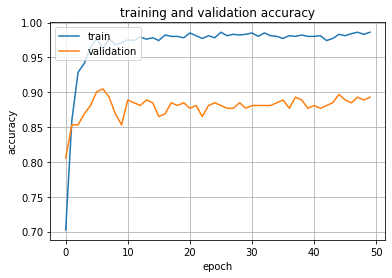

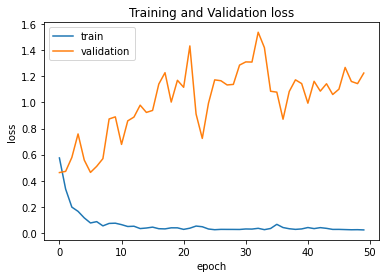

In [22]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
model_1.evaluate(X_test,Y_test,batch_size=6)

2022-05-12 06:46:13.819209: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 483840000 exceeds 10% of free system memory.


42/42 [==============================] - 3s 51ms/step - loss: 1.2253 - accuracy: 0.8929


[1.2253215312957764, 0.8928571343421936]

In [24]:
y_pred=model_1.predict(X_test)

In [25]:
Y_test

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [27]:
#predict
y_pred=model_1.predict(X_test) # (n_images, 1)
y_classes = ((y_pred > 0.5)+0).ravel() 
#y_pred=np.argmax(y_pred,axis=1)
y_pred

array([[6.2135279e-01],
       [9.9999940e-01],
       [9.9996293e-01],
       [8.0600017e-08],
       [2.5660016e-05],
       [7.3555061e-06],
       [1.0000000e+00],
       [9.9999988e-01],
       [9.9995542e-01],
       [7.5967919e-06],
       [1.0000000e+00],
       [9.9273986e-01],
       [9.8545259e-01],
       [9.9956459e-01],
       [9.7416381e-11],
       [1.0000000e+00],
       [9.9999070e-01],
       [9.9999940e-01],
       [5.3092286e-08],
       [2.2797954e-06],
       [3.9691363e-07],
       [5.1687420e-07],
       [6.8575981e-05],
       [9.9940169e-01],
       [9.9840975e-01],
       [2.3232906e-06],
       [4.6726636e-05],
       [9.9999940e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.8616623e-04],
       [4.0433827e-04],
       [2.6526126e-09],
       [1.0000000e+00],
       [9.9403328e-01],
       [2.5445756e-06],
       [1.0489242e-05],
       [7.2898040e-08],
       [2.2341043e-08],
       [4.6228155e-04],
       [1.4044657e-02],
       [3.546028

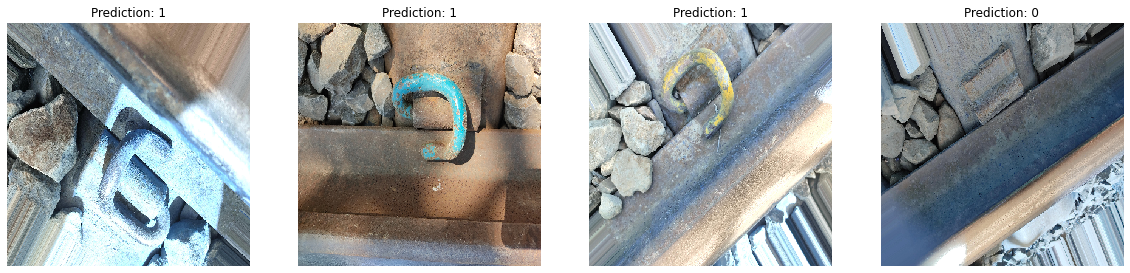

In [28]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
for ax, image, prediction in zip(axes, X_test, y_classes):
    ax.set_axis_off()
    #image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_classes,Y_test))

[[109  10]
 [ 17 116]]


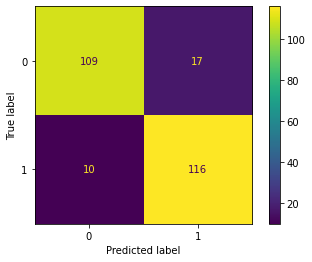

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_classes)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
from sklearn import datasets, svm, metrics

In [32]:
#get classification report
print(classification_report(y_classes,Y_test))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       119
           1       0.92      0.87      0.90       133

    accuracy                           0.89       252
   macro avg       0.89      0.89      0.89       252
weighted avg       0.89      0.89      0.89       252



In [33]:
cm = print(confusion_matrix(y_classes, Y_test))

[[109  10]
 [ 17 116]]


# Grad-Cam for Xception

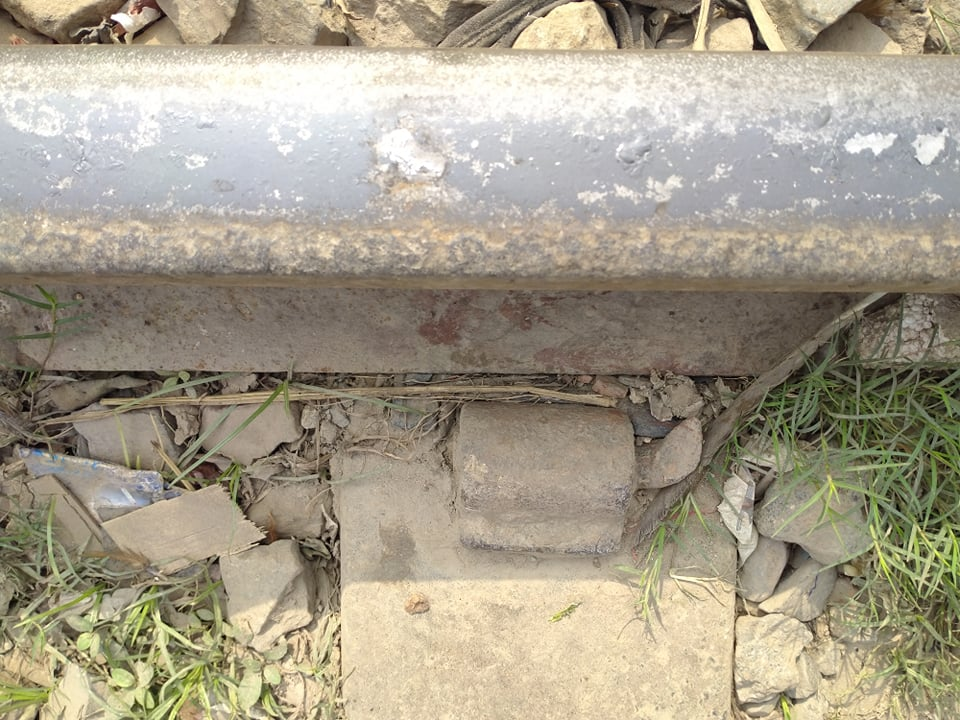

In [47]:
from IPython.display import Image, display

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = 'block14_sepconv2_act'
# The local path to our target image
img_path = '../input/fastener-new-labelled-dataset/dataset_new_fastener/dataset_new_fastener/131084537_190751489449739_279862595635733772_n.jpg'
display(Image(img_path))

In [48]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted: [('n02788148', 'bannister', 5.057161)]


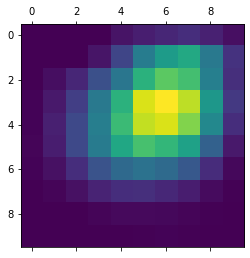

In [49]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

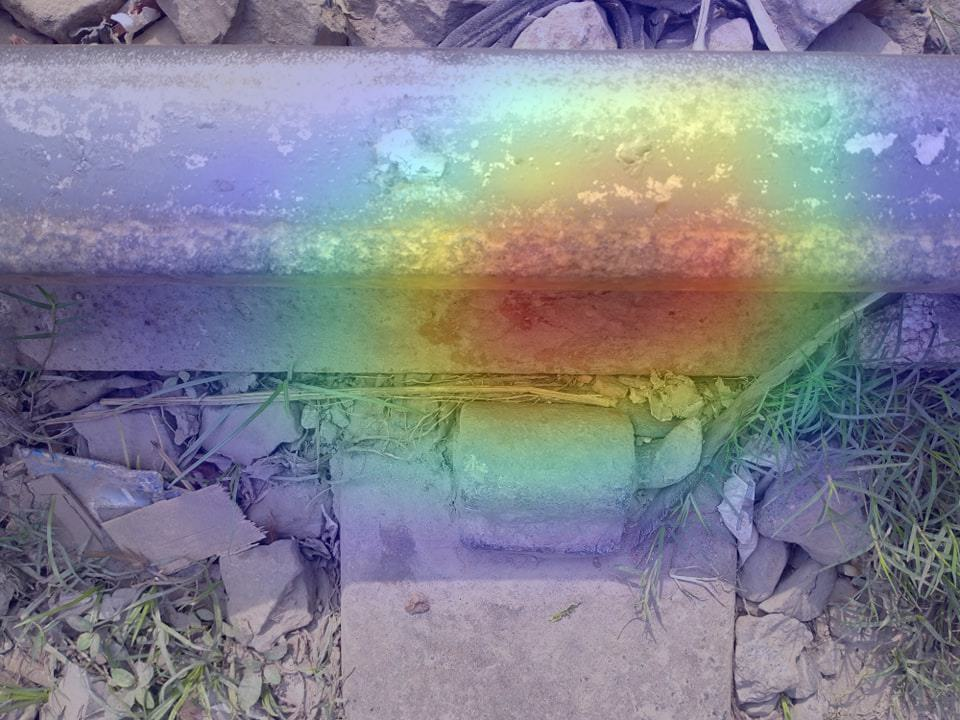

In [50]:
import matplotlib.cm as cm1

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm1.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [51]:
# Load the library
from tensorflow.keras.models import load_model
# Save the model
model_1.save('fastener xception.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
